In [283]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn
import glob, os  
import matplotlib.ticker as mticker


In [284]:
# Code taken from https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

path = 'random_samples'                  # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))    
list = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    list.append(df)

    
df = pd.concat(list, axis=0, ignore_index=False)

print(type(df))
print(df)



<class 'pandas.core.frame.DataFrame'>
   Number of LSTM units  Lookback period  Learning rate  Average MSE
0                     9               37         0.0500     0.000004
1                     7               18         0.0010     0.000003
2                    22               29         0.0001     0.000013
0                    11               19         0.0500     0.000004
1                    35               10         0.5000     0.000133
0                    31               28         0.1000     0.000006
1                    23               12         0.0001     0.000007
2                    25               17         0.5000     0.000032
0                     4               22         0.0010     0.000003
1                     8               25         0.0010     0.000003
0                    26               11         0.0005     0.000003
1                    23               26         0.0010     0.000003
0                    15               27         0.0005     0.000

In [285]:
LSTM_units =df['Number of LSTM units'].values
lookback = df['Lookback period'].values
learning_rate = df['Learning rate'].values
Avg_MSE = df['Average MSE'].values
print(Avg_MSE)



[4.45706551e-06 3.43944935e-06 1.26291959e-05 4.10409191e-06
 1.32712883e-04 5.51231567e-06 6.60572090e-06 3.19622202e-05
 3.44072437e-06 3.44734516e-06 3.43340066e-06 3.44087494e-06
 3.43456631e-06 1.31389430e-05 6.34725581e-05 1.94747978e-05]


In [286]:
print(LSTM_units)

[ 9  7 22 11 35 31 23 25  4  8 26 23 15 28 40 22]


In [310]:
jet=plt.get_cmap('rainbow')

LSTM units: [ 9  7 22 11 35 31 23 25  4  8 26 23 15 28 40 22]
Lookback: [37 18 29 19 10 28 12 17 22 25 11 26 27 40 13 16]
Learning rate: [1.30103 3.      4.      1.30103 0.30103 1.      4.      0.30103 3.
 3.      3.30103 3.      3.30103 1.      1.      4.     ]
[5.35095098 5.46351108 4.8986243  5.38678292 3.87708692 5.25866592
 5.18007978 4.49536306 5.46335012 5.46251523 5.46427551 5.46333111
 5.46412809 4.88143957 4.197414   4.71052704]


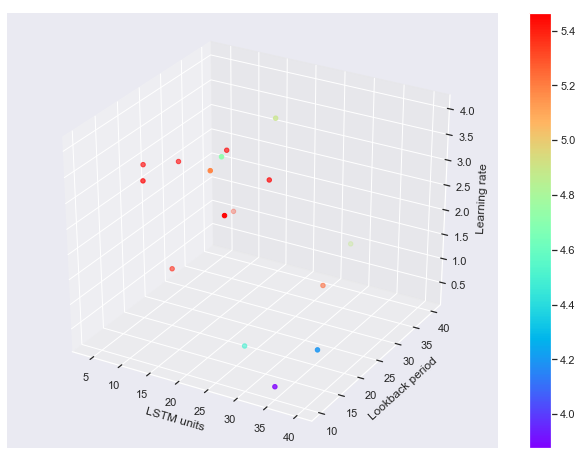

In [311]:

fig = plt.figure(figsize=(11,8))
ax = fig.add_subplot(111, projection='3d')
xs = LSTM_units
ys = lookback
zs = -np.log10(learning_rate)
c =  -np.log10(Avg_MSE)


print('LSTM units:', xs)
print('Lookback:',  ys)
print('Learning rate:', zs)
print(c)
p = ax.scatter(xs,ys,zs, c=c, cmap=jet)


ax.set_xlabel('LSTM units')
ax.set_ylabel('Lookback period')
ax.set_zlabel('Learning rate')
#ax.set_zlim(0,0.5)

fig.colorbar(p)
seaborn.set()
plt.show()

